### Installing dependencies

In [1]:
# Install necessary libraries for data analysis, machine learning, and visualization.

# pandas: for data manipulation and analysis.
# numpy: for numerical operations.
# scikit-learn: for machine learning algorithms and tools.
# matplotlib, seaborn: for data visualization.

%pip install -v pandas numpy scikit-learn matplotlib seaborn

Using pip 25.3 from c:\Users\kasht\Documents\GitHub\2f7bcc6ff1e91c65fd126d1bbe4f43cb0e17abb4a05a12138fef5b83193d1a33\.venv\Lib\site-packages\pip (python 3.13)
Note: you may need to restart the kernel to use updated packages.


### Loading the dataset

In [2]:
import pandas as pd
import numpy as np

# Define the path to the dataset file.
file_path = 'Star39552_balanced.csv'

# Load the dataset.
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    
# Display the first 5 rows to get a feel for the data.
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display a concise summary of the DataFrame.
print("\nDataset Info:")
df.info()

Dataset loaded successfully!

First 5 rows of the dataset:
    Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  10.00  31.66   6.19  1.213    K7V  22.502556            1
1   8.26   3.21   1.00  1.130  K0III  15.792525            0
2   8.27  12.75   1.06  0.596    F9V  18.797552            1
3   6.54   5.23   0.76  1.189  K1III  15.132508            0
4   8.52   0.96   0.72  0.173    B8V  13.431356            1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


### Cleaning the dataset

In [4]:
# Drop columns that are derivative or cause data leakage.
df_clean = df.drop(columns=['Amag', 'SpType', 'e_Plx'])
print("Columns 'Amag', 'SpType' and 'e_Plx' have been removed.")
print("Remaining columns:", df_clean.columns.tolist())

Columns 'Amag', 'SpType' and 'e_Plx' have been removed.
Remaining columns: ['Vmag', 'Plx', 'B-V', 'TargetClass']


### Describing the dataset

In [5]:
# Display descriptive statistics for numerical columns.
print("\nDescriptive Statistics:")
print(df_clean.describe())


Descriptive Statistics:
               Vmag           Plx           B-V   TargetClass
count  39552.000000  39552.000000  39552.000000  39552.000000
mean       7.921309      7.117378      0.744336      0.500000
std        1.308857     12.446291      0.513987      0.500006
min       -0.620000    -27.840000     -0.400000      0.000000
25%        7.210000      2.430000      0.358000      0.000000
50%        8.160000      4.440000      0.703000      0.500000
75%        8.830000      8.232500      1.129000      1.000000
max       12.850000    772.330000      3.440000      1.000000


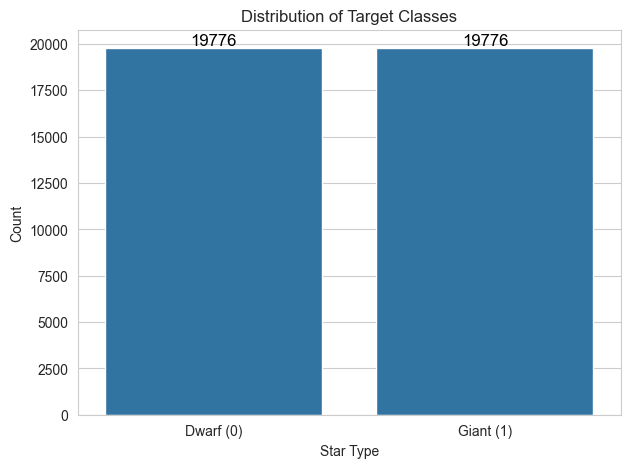

Number of observations: 39552
Recommended bins: 17


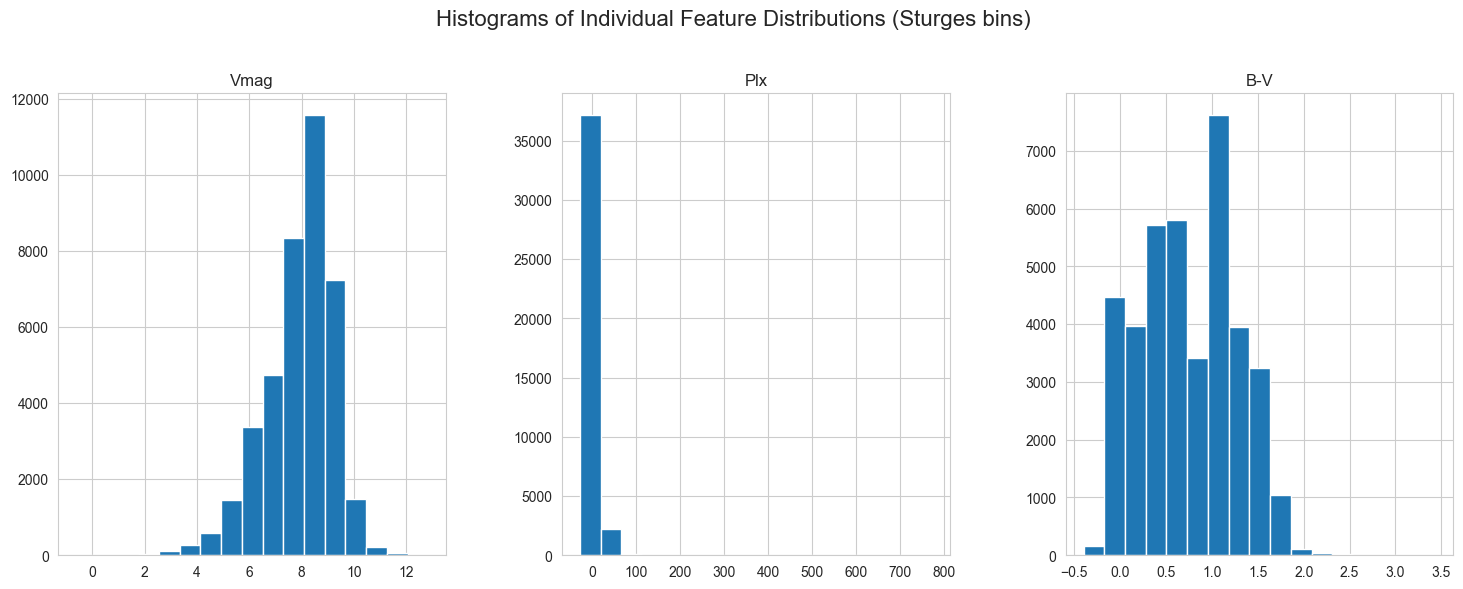


Feature Distributions by Target Class:


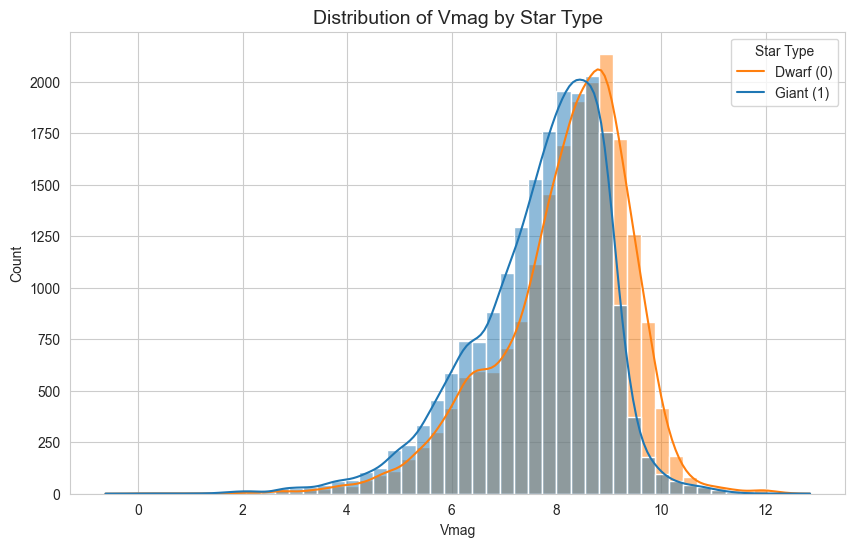

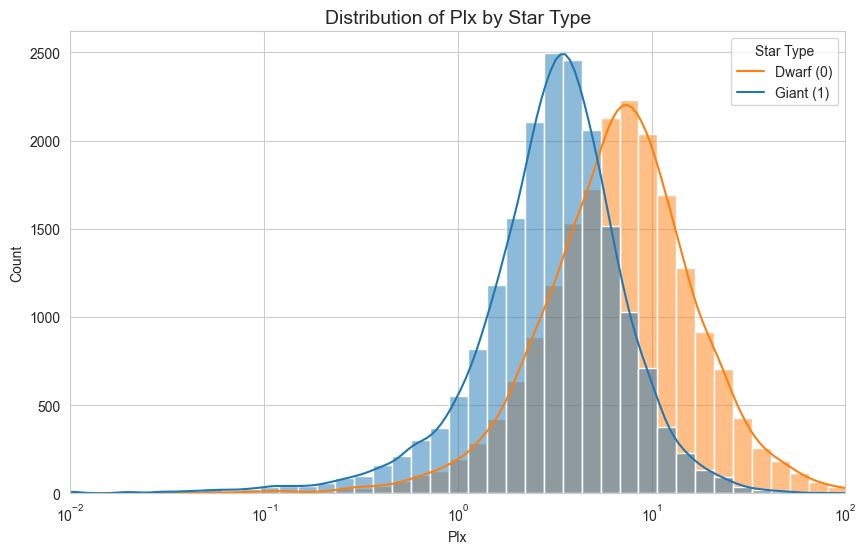

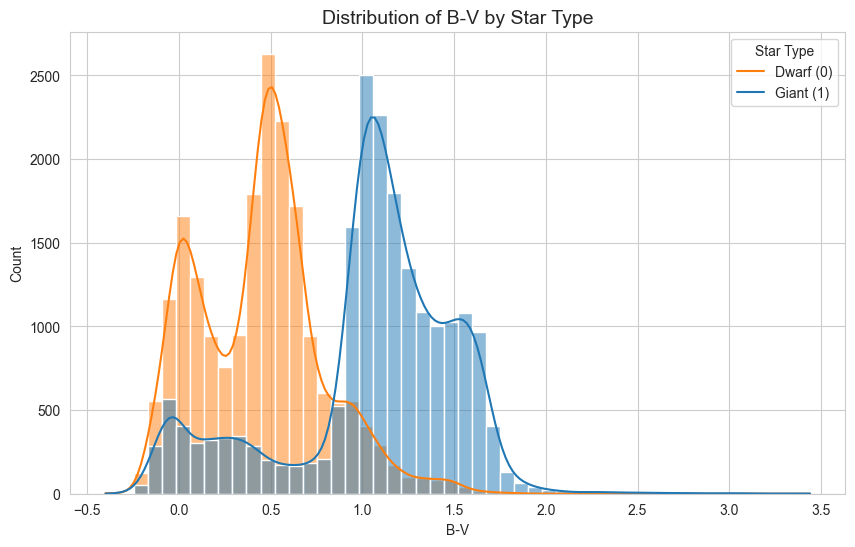

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots for better readability.
sns.set_style("whitegrid")

# 1. Analyze the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x='TargetClass', data=df_clean)
plt.title('Distribution of Target Classes')
plt.xlabel('Star Type')
plt.ylabel('Count')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.xticks([0, 1], ['Dwarf (0)', 'Giant (1)'])
plt.show()


n = len(df_clean)
bins_sturges = int(np.ceil(np.log2(n) + 1))
print(f"Number of observations: {n}")
print(f"Recommended bins: {bins_sturges}")

# 2. Analyze the distribution of individual features
features = ['Vmag', 'Plx', 'B-V']
df_clean[features].hist(bins=bins_sturges, figsize=(18, 6), layout=(1, 3))
plt.suptitle('Histograms of Individual Feature Distributions (Sturges bins)', size=16, y=1.02)
plt.show()


# 3. Analyze feature distributions per class
print("\nFeature Distributions by Target Class:")
for feature in features:
    plt.figure(figsize=(10, 6))
    
    if feature == 'Plx':
        data_to_plot = df_clean[df_clean['Plx'] > 0].copy()
        
        sns.histplot(
            data=data_to_plot,
            x=feature,
            hue='TargetClass',
            kde=True,
            bins=50,
            log_scale=(True, False)
        )
        
        plt.xlim(0.01, 100)
        plt.title(f'Distribution of {feature} by Star Type', size=14)
    
    else:
        data_to_plot = df_clean
        sns.histplot(
            data=data_to_plot,
            x=feature,
            hue='TargetClass',
            kde=True,
            bins=50
        )
        plt.title(f'Distribution of {feature} by Star Type', size=14)
    
    plt.legend(title='Star Type', labels=['Dwarf (0)', 'Giant (1)'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### Selecting most important features

In [6]:
# Separate features (X) and target (y)
X = df_clean.drop('TargetClass', axis=1)
y = df_clean['TargetClass']
feature_names = X.columns
print("Features and Target are separated.")

Features and Target are separated.


Feature Importance using ANOVA F-test:
  Feature       F-Score
2     B-V  21329.755816
1     Plx   2672.093294
0    Vmag   1266.283460


C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\4098700681.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=f_scores, palette='viridis')


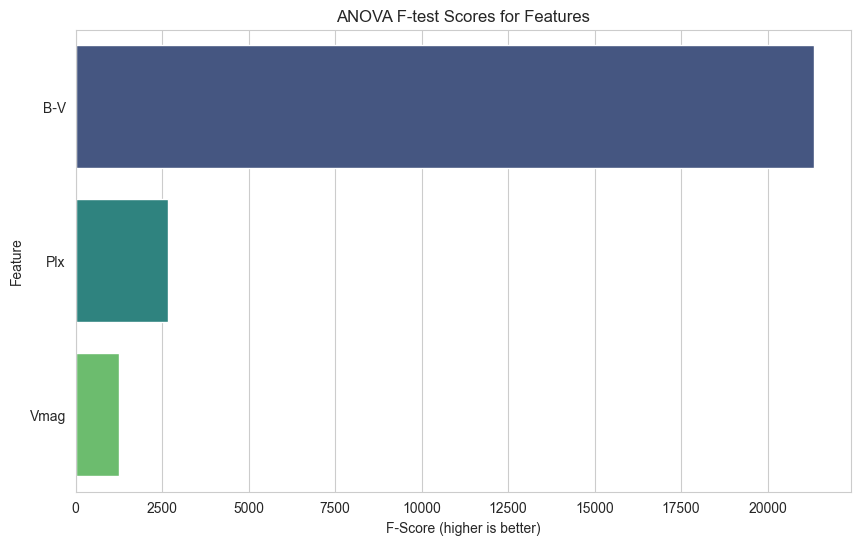

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest selects features based on the k highest scores.
f_selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data.
f_selector.fit(X, y)

# Get the scores for each feature.
f_scores = pd.DataFrame({'Feature': feature_names, 'F-Score': f_selector.scores_})
f_scores = f_scores.sort_values(by='F-Score', ascending=False)

print("Feature Importance using ANOVA F-test:")
print(f_scores)

# Visualize the F-scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=f_scores, palette='viridis')
plt.title('ANOVA F-test Scores for Features')
plt.xlabel('F-Score (higher is better)')
plt.ylabel('Feature')
plt.show()

Feature Importance from Decision Tree:
  Feature  Importance
2     B-V    0.630359
1     Plx    0.225122
0    Vmag    0.144519


C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\2424012149.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='mako')


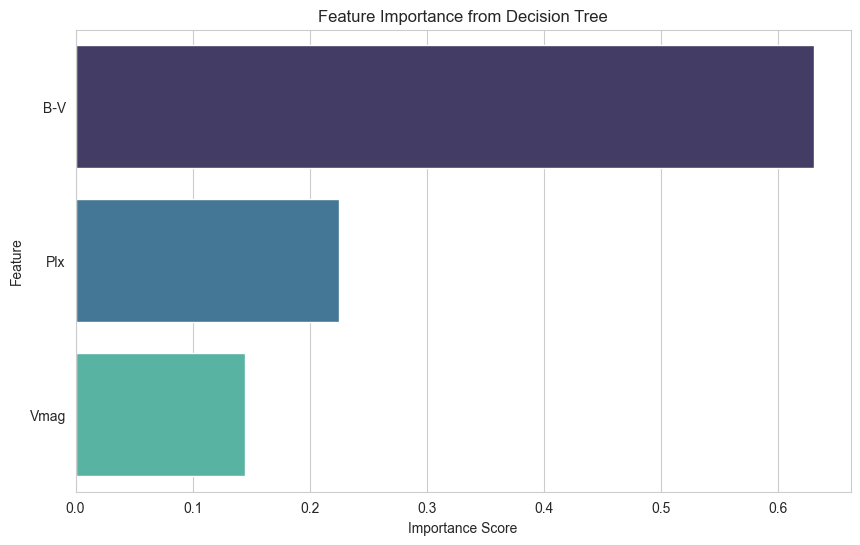

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a simple Decision Tree Classifier.
tree_model_for_importance = DecisionTreeClassifier(random_state=42)

# Fit the model to the data.
tree_model_for_importance.fit(X, y)

# Get feature importances from the trained model.
importances = tree_model_for_importance.feature_importances_
tree_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
tree_importances = tree_importances.sort_values(by='Importance', ascending=False)

print("Feature Importance from Decision Tree:")
print(tree_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='mako')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Feature Importance using Mutual Information:
  Feature  Mutual_Information
2     B-V            0.299973
1     Plx            0.107951
0    Vmag            0.031177


C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\539499514.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Information', y='Feature', data=mi_scores_df, palette='plasma')


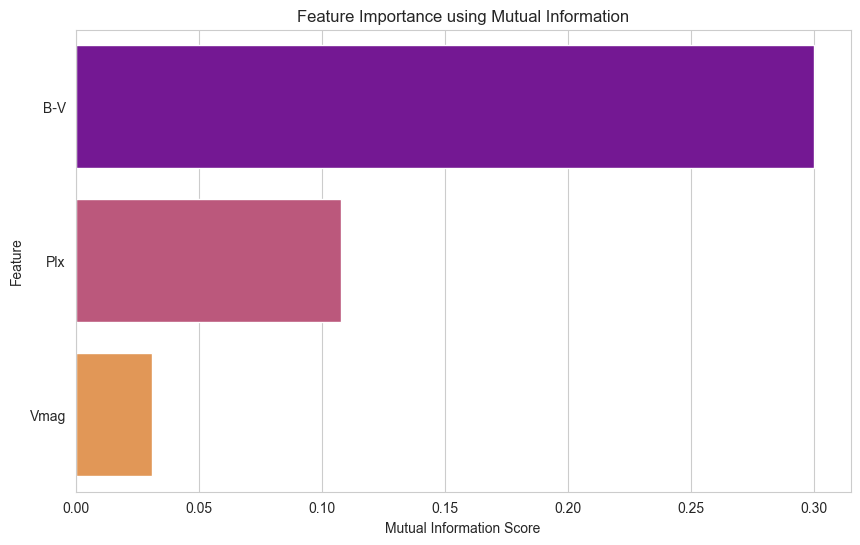

In [13]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores.
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization.
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)

print("Feature Importance using Mutual Information:")
print(mi_scores_df)

# Visualize the mutual information scores.
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Information', y='Feature', data=mi_scores_df, palette='plasma')
plt.title('Feature Importance using Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

### Building categorized scatter plots

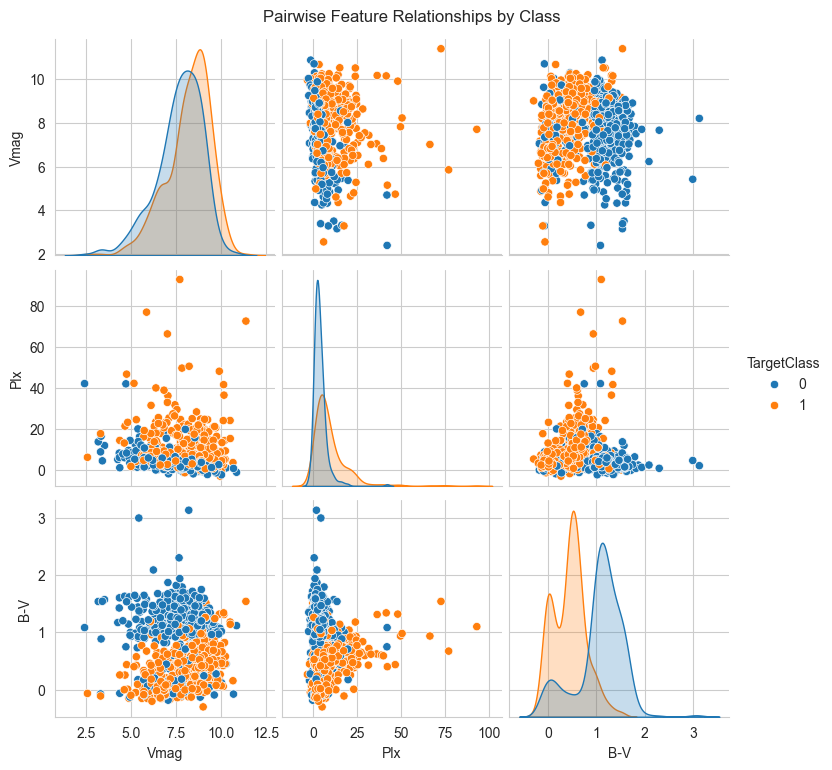

In [23]:
# Visualize the relationship between pairs of features, coloring points by class.
df_sample = df_clean.sample(n=1024, random_state=42)
sns.pairplot(df_sample, hue='TargetClass', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Class', y=1.02)
plt.show()

### Preprocessing the dataset

In [24]:
from sklearn.model_selection import train_test_split

# Get features and target.
X = df_clean.drop('TargetClass', axis=1)
y = df_clean['TargetClass']

# Generate train and test splits using 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

Training set shape: (31641, 3)
Test set shape: (7911, 3)
Training target distribution:
TargetClass
1    0.500016
0    0.499984
Name: proportion, dtype: float64
Test target distribution:
TargetClass
0    0.500063
1    0.499937
Name: proportion, dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler

# Create standard scaler.
scaler = StandardScaler()

# Fit the scaler on the training data and transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data.
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFirst 5 rows of the scaled training data:")
print(X_train_scaled.head())


First 5 rows of the scaled training data:
       Vmag       Plx       B-V
0  1.652378 -0.214107 -1.557623
1 -0.753237 -0.009323  0.597161
2  0.771341  2.136988  0.597161
3  0.801985 -0.358763  0.418082
4 -0.446790 -0.485119 -1.324042


### k-Nearest Neighbors Method

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the model.
knn = KNeighborsClassifier()

# Define the parameter grid.
param_grid = {'n_neighbors': np.arange(1, 31, 2)}

# Set up GridSearchCV.
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data.
print("Searching for the best 'k' for kNN...")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter.
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal 'k' found: {best_k}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Searching for the best 'k' for kNN...
Optimal 'k' found: 29
Best cross-validation accuracy: 0.8817


In [27]:
# Create the final kNN model with the optimal number of neighbors.
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire scaled training set.
knn_best.fit(X_train_scaled, y_train)
print("\nkNN model trained with optimal k.")


kNN model trained with optimal k.


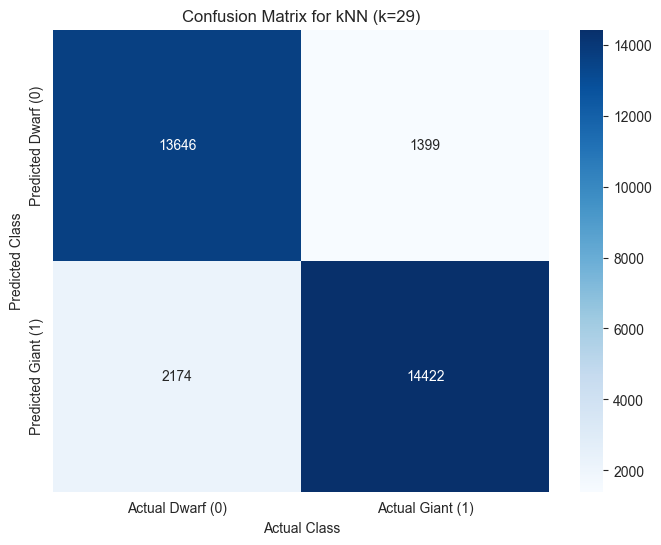

Core Metrics:
  - Accuracy: 0.8871
  - AUC-ROC:  0.9519

Precision:
  - Macro-Averaged: 0.8880
  - Micro-Averaged: 0.8871

Recall:
  - Macro-Averaged: 0.8871
  - Micro-Averaged: 0.8871

F1-score:
  - Macro-Averaged: 0.8870
  - Micro-Averaged: 0.8871



In [68]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix)

# Make predictions on the test data.
y_pred_knn = knn_best.predict(X_train_scaled)
y_pred_proba_knn = knn_best.predict_proba(X_train_scaled)[:, 1]

# 1. Confusion Matrix
cm_knn = confusion_matrix(y_train, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn.T, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title(f'Confusion Matrix for kNN (k={best_k})')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_knn = accuracy_score(y_train, y_pred_knn)
auc_knn = roc_auc_score(y_train, y_pred_proba_knn)

# Precision
precision_macro_knn = precision_score(y_train, y_pred_knn, average='macro')
precision_micro_knn = precision_score(y_train, y_pred_knn, average='micro')

# Recall
recall_macro_knn = recall_score(y_train, y_pred_knn, average='macro')
recall_micro_knn = recall_score(y_train, y_pred_knn, average='micro')

# F-measure (F1-score)
f1_macro_knn = f1_score(y_train, y_pred_knn, average='macro')
f1_micro_knn = f1_score(y_train, y_pred_knn, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_knn:.4f}")
print(f"  - AUC-ROC:  {auc_knn:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_knn:.4f}")
print(f"  - Micro-Averaged: {precision_micro_knn:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_knn:.4f}")
print(f"  - Micro-Averaged: {recall_micro_knn:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_knn:.4f}")
print(f"  - Micro-Averaged: {f1_micro_knn:.4f}\n")

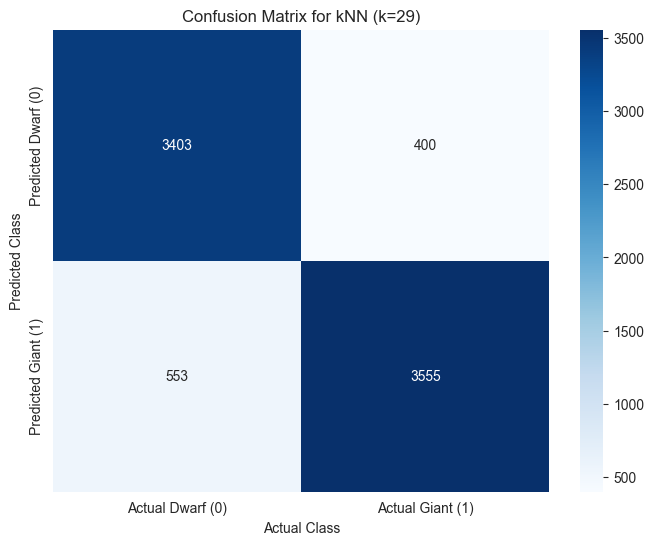

Core Metrics:
  - Accuracy: 0.8795
  - AUC-ROC:  0.9338

Precision:
  - Macro-Averaged: 0.8801
  - Micro-Averaged: 0.8795

Recall:
  - Macro-Averaged: 0.8795
  - Micro-Averaged: 0.8795

F1-score:
  - Macro-Averaged: 0.8795
  - Micro-Averaged: 0.8795



In [70]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix)

# Make predictions on the test data.
y_pred_knn = knn_best.predict(X_test_scaled)
y_pred_proba_knn = knn_best.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn.T, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title(f'Confusion Matrix for kNN (k={best_k})')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Precision
precision_macro_knn = precision_score(y_test, y_pred_knn, average='macro')
precision_micro_knn = precision_score(y_test, y_pred_knn, average='micro')

# Recall
recall_macro_knn = recall_score(y_test, y_pred_knn, average='macro')
recall_micro_knn = recall_score(y_test, y_pred_knn, average='micro')

# F-measure (F1-score)
f1_macro_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_micro_knn = f1_score(y_test, y_pred_knn, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_knn:.4f}")
print(f"  - AUC-ROC:  {auc_knn:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_knn:.4f}")
print(f"  - Micro-Averaged: {precision_micro_knn:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_knn:.4f}")
print(f"  - Micro-Averaged: {recall_micro_knn:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_knn:.4f}")
print(f"  - Micro-Averaged: {f1_micro_knn:.4f}\n")

# Store results for final comparison
model_results = {}
model_results['kNN'] = {
    'Accuracy': accuracy_knn,
    'AUC-ROC': auc_knn,
    'F1-Macro': f1_macro_knn,
    'Precision-Macro': precision_macro_knn,
    'Recall-Macro': recall_macro_knn
}

### Decision Tree Method

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model.
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid. We'll search for the best combination of these parameters.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV.
print("Searching for the best parameters for Decision Tree...")
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data.
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_dt = grid_search_dt.best_params_
print(f"Optimal parameters found: {best_params_dt}")
print(f"Best cross-validation accuracy: {grid_search_dt.best_score_:.4f}")

Searching for the best parameters for Decision Tree...
Optimal parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8775


In [36]:
# Create the final Decision Tree model with the optimal parameters.
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Train the model.
dt_best.fit(X_train_scaled, y_train)
print("\nDecision Tree model trained with optimal parameters.")


Decision Tree model trained with optimal parameters.


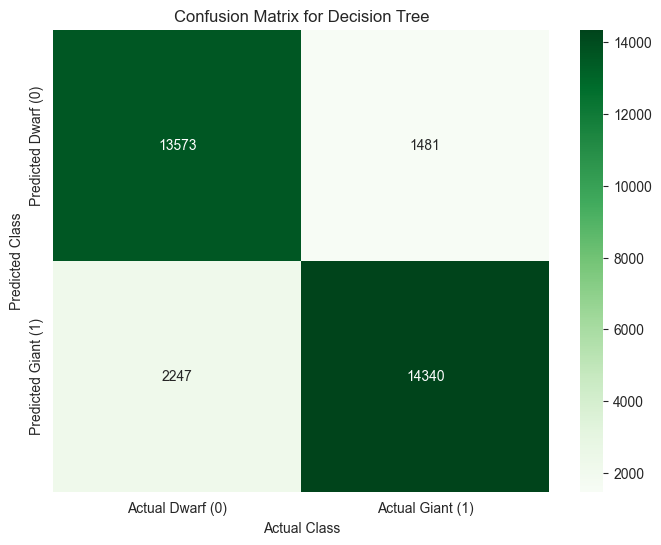

Core Metrics:
  - Accuracy: 0.8822
  - AUC-ROC:  0.9340

Precision:
  - Macro-Averaged: 0.8831
  - Micro-Averaged: 0.8822

Recall:
  - Macro-Averaged: 0.8822
  - Micro-Averaged: 0.8822

F1-score:
  - Macro-Averaged: 0.8821
  - Micro-Averaged: 0.8822



In [ ]:
# Make predictions.
y_pred_dt = dt_best.predict(X_train_scaled)
y_pred_proba_dt = dt_best.predict_proba(X_train_scaled)[:, 1]

# 1. Confusion Matrix
cm_dt = confusion_matrix(y_train, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt.T, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_dt = accuracy_score(y_train, y_pred_dt)
auc_dt = roc_auc_score(y_train, y_pred_proba_dt)

# Precision
precision_macro_dt = precision_score(y_train, y_pred_dt, average='macro')
precision_micro_dt = precision_score(y_train, y_pred_dt, average='micro')

# Recall
recall_macro_dt = recall_score(y_train, y_pred_dt, average='macro')
recall_micro_dt = recall_score(y_train, y_pred_dt, average='micro')

# F-measure (F1-score)
f1_macro_dt = f1_score(y_train, y_pred_dt, average='macro')
f1_micro_dt = f1_score(y_train, y_pred_dt, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_dt:.4f}")
print(f"  - AUC-ROC:  {auc_dt:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_dt:.4f}")
print(f"  - Micro-Averaged: {precision_micro_dt:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_dt:.4f}")
print(f"  - Micro-Averaged: {recall_micro_dt:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_dt:.4f}")
print(f"  - Micro-Averaged: {f1_micro_dt:.4f}\n")

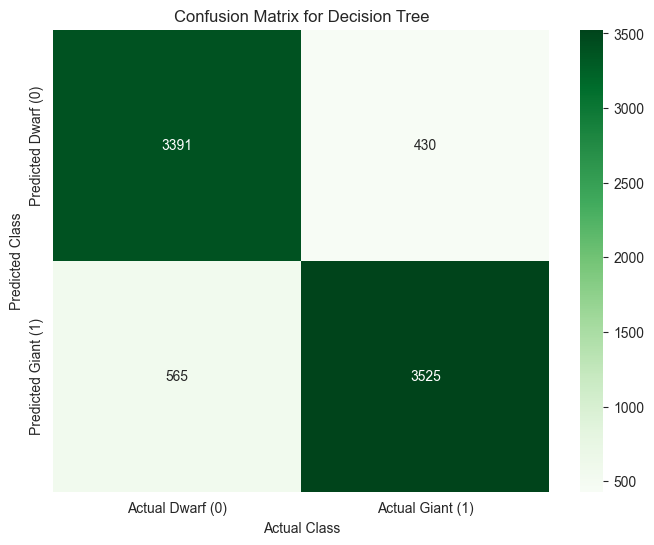

Core Metrics:
  - Accuracy: 0.8742
  - AUC-ROC:  0.9274

Precision:
  - Macro-Averaged: 0.8747
  - Micro-Averaged: 0.8742

Recall:
  - Macro-Averaged: 0.8742
  - Micro-Averaged: 0.8742

F1-score:
  - Macro-Averaged: 0.8742
  - Micro-Averaged: 0.8742



In [71]:
# Make predictions.
y_pred_dt = dt_best.predict(X_test_scaled)
y_pred_proba_dt = dt_best.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt.T, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Precision
precision_macro_dt = precision_score(y_test, y_pred_dt, average='macro')
precision_micro_dt = precision_score(y_test, y_pred_dt, average='micro')

# Recall
recall_macro_dt = recall_score(y_test, y_pred_dt, average='macro')
recall_micro_dt = recall_score(y_test, y_pred_dt, average='micro')

# F-measure (F1-score)
f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro')
f1_micro_dt = f1_score(y_test, y_pred_dt, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_dt:.4f}")
print(f"  - AUC-ROC:  {auc_dt:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_dt:.4f}")
print(f"  - Micro-Averaged: {precision_micro_dt:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_dt:.4f}")
print(f"  - Micro-Averaged: {recall_micro_dt:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_dt:.4f}")
print(f"  - Micro-Averaged: {f1_micro_dt:.4f}\n")

# Store results for final comparison
model_results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'AUC-ROC': auc_dt,
    'F1-Macro': f1_macro_dt,
    'Precision-Macro': precision_macro_dt,
    'Recall-Macro': recall_macro_dt
}

### Random Forest Method (Bagging Ensemble Method using Decision Tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model.
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid.
param_grid_rf = {
    'n_estimators': [32, 64, 128],           # Number of trees in the forest
    'max_depth': [16, 32, 64],               # Maximum depth of the trees
    'min_samples_leaf': [4, 16, 32],         # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']         # Number of features to consider when looking for the best split
}

# Set up GridSearchCV.
print("Searching for the best parameters for Random Forest...")
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search.
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_rf = grid_search_rf.best_params_
print(f"Optimal parameters found: {best_params_rf}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_:.4f}")

Searching for the best parameters for Random Forest...

Optimal parameters found: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}
Best cross-validation accuracy: 0.8838


In [44]:
# Create the final Random Forest model with the optimal parameters.
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the model.
rf_best.fit(X_train_scaled, y_train)
print("\nRandom Forest model trained with optimal parameters.")


Random Forest model trained with optimal parameters.


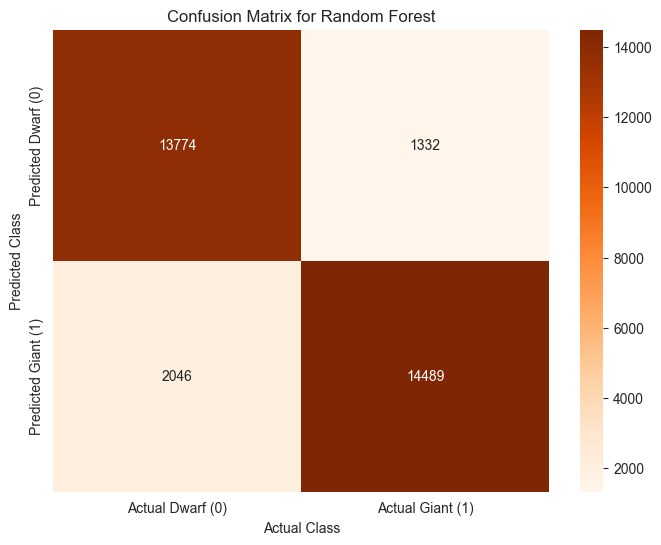

Core Metrics:
  - Accuracy: 0.8932
  - AUC-ROC:  0.9646

Precision:
  - Macro-Averaged: 0.8940
  - Micro-Averaged: 0.8932

Recall:
  - Macro-Averaged: 0.8932
  - Micro-Averaged: 0.8932

F1-score:
  - Macro-Averaged: 0.8932
  - Micro-Averaged: 0.8932



In [ ]:
# Make predictions.
y_pred_rf = rf_best.predict(X_train_scaled)
y_pred_proba_rf = rf_best.predict_proba(X_train_scaled)[:, 1]

# 1. Confusion Matrix
cm_rf = confusion_matrix(y_train, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf.T, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_rf = accuracy_score(y_train, y_pred_rf)
auc_rf = roc_auc_score(y_train, y_pred_proba_rf)

# Precision
precision_macro_rf = precision_score(y_train, y_pred_rf, average='macro')
precision_micro_rf = precision_score(y_train, y_pred_rf, average='micro')

# Recall
recall_micro_rf = recall_score(y_train, y_pred_rf, average='micro')
recall_macro_rf = recall_score(y_train, y_pred_rf, average='macro')

# F-measure (F1-score)
f1_macro_rf = f1_score(y_train, y_pred_rf, average='macro')
f1_micro_rf = f1_score(y_train, y_pred_rf, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_rf:.4f}")
print(f"  - AUC-ROC:  {auc_rf:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_rf:.4f}")
print(f"  - Micro-Averaged: {precision_micro_rf:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_rf:.4f}")
print(f"  - Micro-Averaged: {recall_micro_rf:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_rf:.4f}")
print(f"  - Micro-Averaged: {f1_micro_rf:.4f}\n")

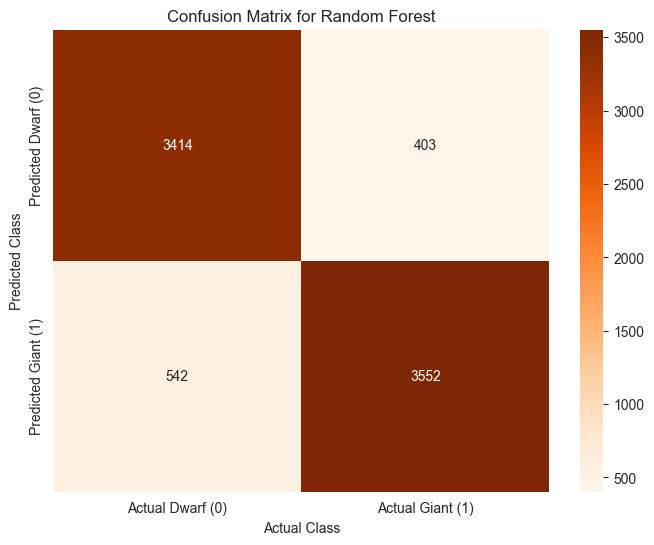

Core Metrics:
  - Accuracy: 0.8805
  - AUC-ROC:  0.9377

Precision:
  - Macro-Averaged: 0.8810
  - Micro-Averaged: 0.8805

Recall:
  - Macro-Averaged: 0.8805
  - Micro-Averaged: 0.8805

F1-score:
  - Macro-Averaged: 0.8805
  - Micro-Averaged: 0.8805



In [72]:
# Make predictions.
y_pred_rf = rf_best.predict(X_test_scaled)
y_pred_proba_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf.T, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Precision
precision_macro_rf = precision_score(y_test, y_pred_rf, average='macro')
precision_micro_rf = precision_score(y_test, y_pred_rf, average='micro')

# Recall
recall_micro_rf = recall_score(y_test, y_pred_rf, average='micro')
recall_macro_rf = recall_score(y_test, y_pred_rf, average='macro')

# F-measure (F1-score)
f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_micro_rf = f1_score(y_test, y_pred_rf, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_rf:.4f}")
print(f"  - AUC-ROC:  {auc_rf:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_rf:.4f}")
print(f"  - Micro-Averaged: {precision_micro_rf:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_rf:.4f}")
print(f"  - Micro-Averaged: {recall_micro_rf:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_rf:.4f}")
print(f"  - Micro-Averaged: {f1_micro_rf:.4f}\n")

# Store results for final comparison
model_results['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'AUC-ROC': auc_rf,
    'F1-Macro': f1_macro_rf,
    'Precision-Macro': precision_macro_rf,
    'Recall-Macro': recall_macro_rf
}

### Support Vector Machine Method

In [47]:
from sklearn.svm import SVC

# Define the model.
svm = SVC(probability=True, random_state=42)

# Define a more focused parameter grid.
param_grid_svm = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'gamma': ['scale', 'auto', 0.1]       # Kernel coefficient
}

# Set up GridSearchCV.
print("Searching for the best parameters for SVM...")
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search. SVM requires scaled data.
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_svm = grid_search_svm.best_params_
print(f"Optimal parameters found: {best_params_svm}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")

Searching for the best parameters for SVM...
Optimal parameters found: {'C': 10, 'gamma': 'scale'}
Best cross-validation accuracy: 0.8812


In [48]:
# Create the final SVM model with the optimal parameters.
svm_best = SVC(**best_params_svm, probability=True, random_state=42)

# Train the model.
svm_best.fit(X_train_scaled, y_train)
print("\nSVM model trained with optimal parameters.")


SVM model trained with optimal parameters.


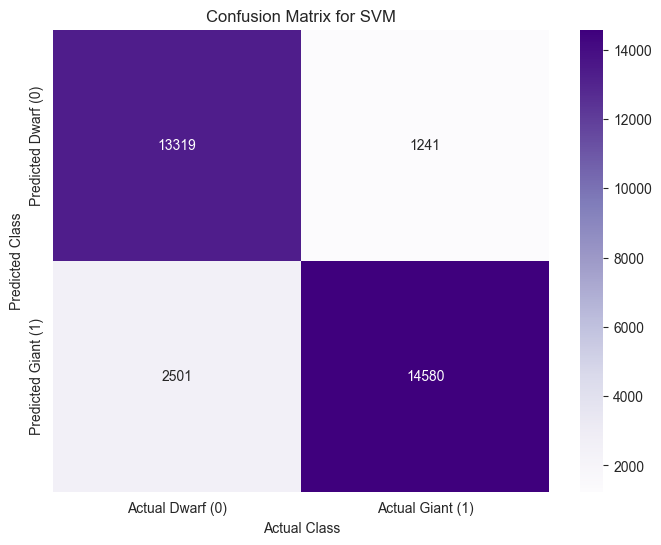

Core Metrics:
  - Accuracy: 0.8817
  - AUC-ROC:  0.9317

Precision:
  - Macro-Averaged: 0.8842
  - Micro-Averaged: 0.8817

Recall:
  - Macro-Averaged: 0.8817
  - Micro-Averaged: 0.8817

F1-score:
  - Macro-Averaged: 0.8815
  - Micro-Averaged: 0.8817



In [ ]:
# Make predictions.
y_pred_svm = svm_best.predict(X_train_scaled)
y_pred_proba_svm = svm_best.predict_proba(X_train_scaled)[:, 1]

# 1. Confusion Matrix
cm_svm = confusion_matrix(y_train, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm.T, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_svm = accuracy_score(y_train, y_pred_svm)
auc_svm = roc_auc_score(y_train, y_pred_proba_svm)

# Precision
precision_macro_svm = precision_score(y_train, y_pred_svm, average='macro')
precision_micro_svm = precision_score(y_train, y_pred_svm, average='micro')

# Recall
recall_macro_svm = recall_score(y_train, y_pred_svm, average='macro')
recall_micro_svm = recall_score(y_train, y_pred_svm, average='micro')

# F-measure (F1-score)
f1_macro_svm = f1_score(y_train, y_pred_svm, average='macro')
f1_micro_svm = f1_score(y_train, y_pred_svm, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_svm:.4f}")
print(f"  - AUC-ROC:  {auc_svm:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_svm:.4f}")
print(f"  - Micro-Averaged: {precision_micro_svm:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_svm:.4f}")
print(f"  - Micro-Averaged: {recall_micro_svm:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_svm:.4f}")
print(f"  - Micro-Averaged: {f1_micro_svm:.4f}\n")

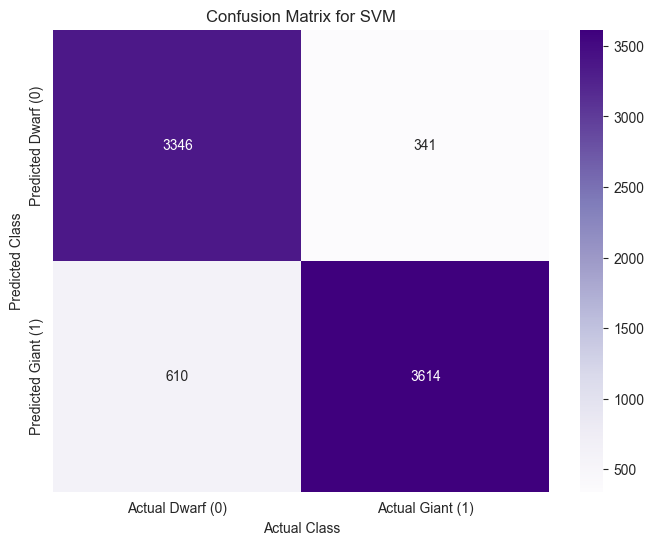

Core Metrics:
  - Accuracy: 0.8798
  - AUC-ROC:  0.9271

Precision:
  - Macro-Averaged: 0.8816
  - Micro-Averaged: 0.8798

Recall:
  - Macro-Averaged: 0.8798
  - Micro-Averaged: 0.8798

F1-score:
  - Macro-Averaged: 0.8796
  - Micro-Averaged: 0.8798



In [73]:
# Make predictions.
y_pred_svm = svm_best.predict(X_test_scaled)
y_pred_proba_svm = svm_best.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm.T, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Precision
precision_macro_svm = precision_score(y_test, y_pred_svm, average='macro')
precision_micro_svm = precision_score(y_test, y_pred_svm, average='micro')

# Recall
recall_macro_svm = recall_score(y_test, y_pred_svm, average='macro')
recall_micro_svm = recall_score(y_test, y_pred_svm, average='micro')

# F-measure (F1-score)
f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro')
f1_micro_svm = f1_score(y_test, y_pred_svm, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_svm:.4f}")
print(f"  - AUC-ROC:  {auc_svm:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_svm:.4f}")
print(f"  - Micro-Averaged: {precision_micro_svm:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_svm:.4f}")
print(f"  - Micro-Averaged: {recall_micro_svm:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_svm:.4f}")
print(f"  - Micro-Averaged: {f1_micro_svm:.4f}\n")

# Store results for final comparison
model_results['SVM'] = {
    'Accuracy': accuracy_svm,
    'AUC-ROC': auc_svm,
    'F1-Macro': f1_macro_svm,
    'Precision-Macro': precision_macro_svm,
    'Recall-Macro': recall_macro_svm
}

### Neural Network Method

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the model.
mlp = MLPClassifier(random_state=42, max_iter=1024)

# Define the parameter grid.
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.00001, 0.0001, 0.001]
}

# Set up GridSearchCV.
print("Searching for the best parameters for Neural Network...")
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search.
grid_search_mlp.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_mlp = grid_search_mlp.best_params_
print(f"Optimal parameters found: {best_params_mlp}")
print(f"Best cross-validation accuracy: {grid_search_mlp.best_score_:.4f}")

Searching for the best parameters for Neural Network...
Optimal parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 25)}
Best cross-validation accuracy: 0.8848


In [52]:
# Create the final MLP model with the optimal parameters.
mlp_best = MLPClassifier(**best_params_mlp, random_state=42, max_iter=1024)

# Train the model.
mlp_best.fit(X_train_scaled, y_train)
print("\nNeural Network model trained with optimal parameters.")


Neural Network model trained with optimal parameters.


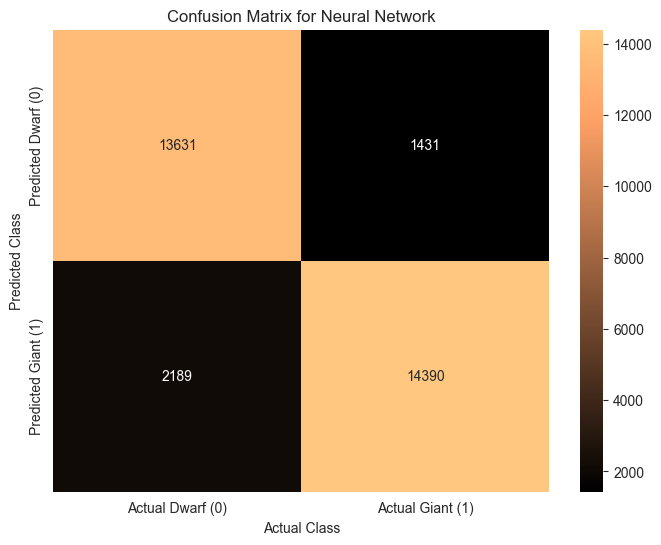

Core Metrics:
  - Accuracy: 0.8856
  - AUC-ROC:  0.9451

Precision:
  - Macro-Averaged: 0.8865
  - Micro-Averaged: 0.8856

Recall:
  - Macro-Averaged: 0.8856
  - Micro-Averaged: 0.8856

F1-score:
  - Macro-Averaged: 0.8855
  - Micro-Averaged: 0.8856



In [ ]:
# Make predictions.
y_pred_mlp = mlp_best.predict(X_train_scaled)
y_pred_proba_mlp = mlp_best.predict_proba(X_train_scaled)[:, 1]

# 1. Confusion Matrix
cm_mlp = confusion_matrix(y_train, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp.T, annot=True, fmt='d', cmap='copper',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_mlp = accuracy_score(y_train, y_pred_mlp)
auc_mlp = roc_auc_score(y_train, y_pred_proba_mlp)

# Precision
precision_macro_mlp = precision_score(y_train, y_pred_mlp, average='macro')
precision_micro_mlp = precision_score(y_train, y_pred_mlp, average='micro')

# Recall
recall_macro_mlp = recall_score(y_train, y_pred_mlp, average='macro')
recall_micro_mlp = recall_score(y_train, y_pred_mlp, average='micro')

# F-measure (F1-score)
f1_macro_mlp = f1_score(y_train, y_pred_mlp, average='macro')
f1_micro_mlp = f1_score(y_train, y_pred_mlp, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_mlp:.4f}")
print(f"  - AUC-ROC:  {auc_mlp:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {precision_micro_mlp:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {recall_micro_mlp:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {f1_micro_mlp:.4f}\n")

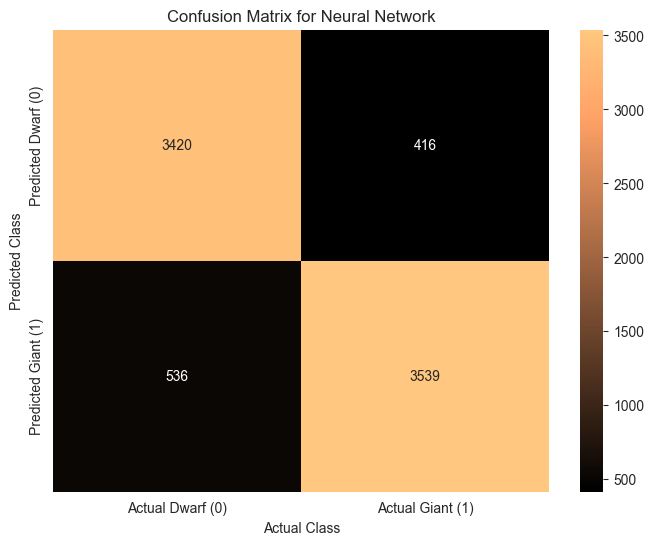

Core Metrics:
  - Accuracy: 0.8797
  - AUC-ROC:  0.9415

Precision:
  - Macro-Averaged: 0.8800
  - Micro-Averaged: 0.8797

Recall:
  - Macro-Averaged: 0.8797
  - Micro-Averaged: 0.8797

F1-score:
  - Macro-Averaged: 0.8796
  - Micro-Averaged: 0.8797



In [74]:
# Make predictions.
y_pred_mlp = mlp_best.predict(X_test_scaled)
y_pred_proba_mlp = mlp_best.predict_proba(X_test_scaled)[:, 1]

# 1. Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp.T, annot=True, fmt='d', cmap='copper',
            xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
            yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()

# 2. Required Metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)

# Precision
precision_macro_mlp = precision_score(y_test, y_pred_mlp, average='macro')
precision_micro_mlp = precision_score(y_test, y_pred_mlp, average='micro')

# Recall
recall_macro_mlp = recall_score(y_test, y_pred_mlp, average='macro')
recall_micro_mlp = recall_score(y_test, y_pred_mlp, average='micro')

# F-measure (F1-score)
f1_macro_mlp = f1_score(y_test, y_pred_mlp, average='macro')
f1_micro_mlp = f1_score(y_test, y_pred_mlp, average='micro')

print("Core Metrics:")
print(f"  - Accuracy: {accuracy_mlp:.4f}")
print(f"  - AUC-ROC:  {auc_mlp:.4f}\n")

print("Precision:")
print(f"  - Macro-Averaged: {precision_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {precision_micro_mlp:.4f}\n")

print("Recall:")
print(f"  - Macro-Averaged: {recall_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {recall_micro_mlp:.4f}\n")

print("F1-score:")
print(f"  - Macro-Averaged: {f1_macro_mlp:.4f}")
print(f"  - Micro-Averaged: {f1_micro_mlp:.4f}\n")

# Store results for final comparison
model_results['Neural Network'] = {
    'Accuracy': accuracy_mlp,
    'AUC-ROC': auc_mlp,
    'F1-Macro': f1_macro_mlp,
    'Precision-Macro': precision_macro_mlp,
    'Recall-Macro': recall_macro_mlp
}

### Comparing all results

Final comparison of all models:
                Accuracy   AUC-ROC  F1-Macro  Precision-Macro  Recall-Macro
Random Forest   0.880546  0.937741  0.880510         0.881015      0.880548
SVM             0.879788  0.927098  0.879650         0.881550      0.879792
Neural Network  0.879661  0.941458  0.879634         0.880010      0.879663
kNN             0.879535  0.933800  0.879490         0.880102      0.879537
Decision Tree   0.874226  0.927405  0.874190         0.874661      0.874228


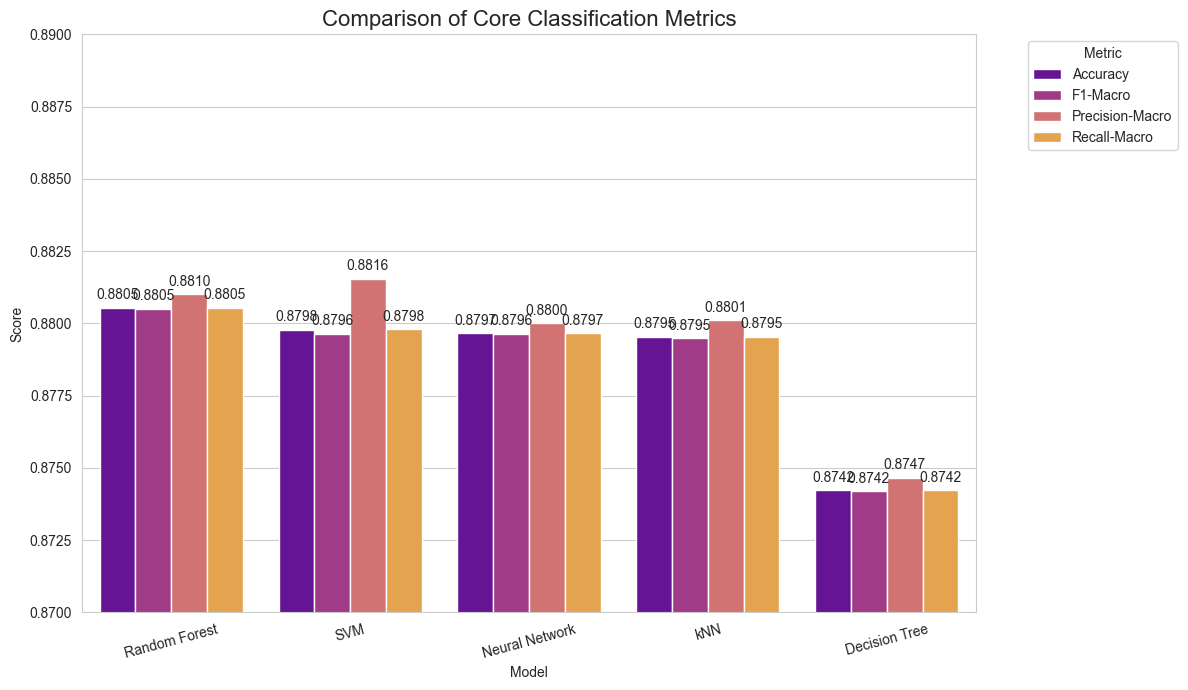

C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\3975941759.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])
C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\3975941759.py:39: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])


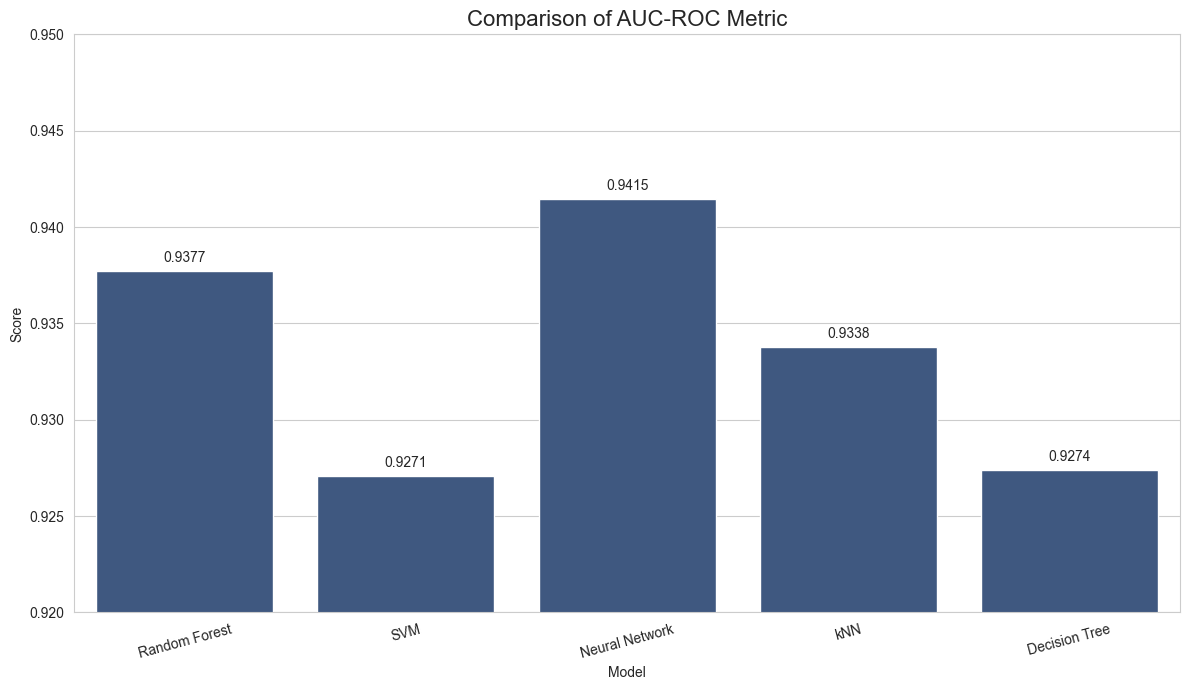

In [ ]:
# Create a pandas DataFrame from the results dictionary.
results_df = pd.DataFrame(model_results).T

results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

print("Final comparison of all models:")
print(results_df_sorted)

# Reset index to use model names in the plot.
results_to_plot = results_df_sorted.reset_index().rename(columns={'index': 'Model'})

# Melt the DataFrame to a long format suitable for seaborn's barplot.
results_melted = pd.melt(results_to_plot, id_vars='Model', var_name='Metric', value_name='Score')

# Core Classification Metrics.
plt.figure(figsize=(12, 7))
metrics_to_plot = results_melted[results_melted['Metric'] != 'AUC-ROC']
ax1 = sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_to_plot, palette='plasma')

# Add score labels.
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Comparison of Core Classification Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.ylim(0.87, 0.89) 
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# AUC-ROC Metric Only.
plt.figure(figsize=(12, 7))
auc_to_plot = results_melted[results_melted['Metric'] == 'AUC-ROC']
ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])

# Add score labels.
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Comparison of AUC-ROC Metric', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.ylim(0.92, 0.95)
plt.tight_layout()
plt.show()

### Assessing Feature Importance

Feature importance from the Random Forest model:
  Feature  Importance
2     B-V    0.635393
1     Plx    0.255855
0    Vmag    0.108753


C:\Users\kasht\AppData\Local\Temp\ipykernel_15304\3411082832.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='rocket')


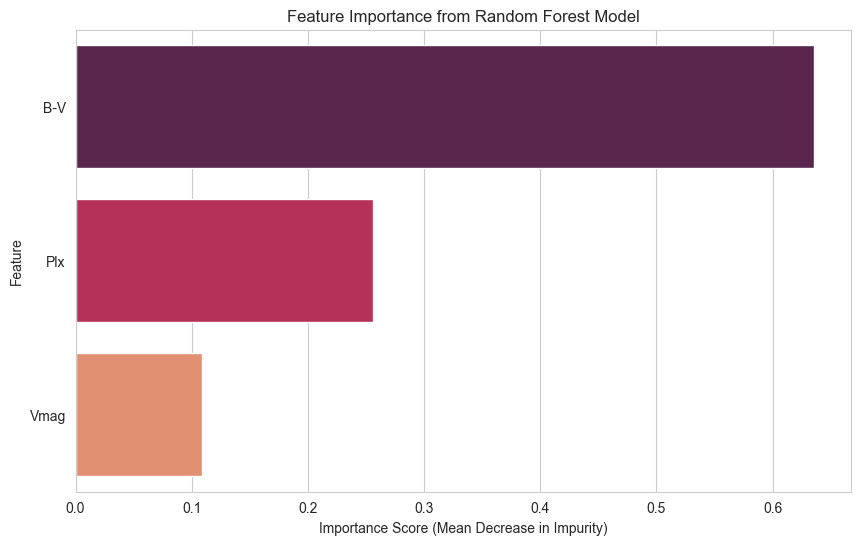

In [110]:
# Get feature importances from the trained model.
importances_rf = rf_best.feature_importances_
feature_names = X_train.columns # Get feature names

# Create a DataFrame for better visualization.
rf_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

print("Feature importance from the Random Forest model:")
print(rf_importances)

# Visualize the feature importances.
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette='rocket')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score (Mean Decrease in Impurity)')
plt.ylabel('Feature')
plt.show()

### Analyzing the impact of a hyperparameters change

In [99]:
# Get the optimal parameters and create a new dictionary for the "weak" model.
weak_params_rf = best_params_rf.copy()
weak_params_rf['max_depth'] = 3

print(f"Optimal model parameters: {best_params_rf}")
print(f"Parameters for 'weak' model: {weak_params_rf}\n")

Optimal model parameters: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}
Parameters for 'weak' model: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}



In [100]:
# Create and train the "weak" Random Forest model.
rf_weak = RandomForestClassifier(**weak_params_rf, random_state=42)
rf_weak.fit(X_train_scaled, y_train)

print("\nRandom Forest model trained with NOT optimal parameters.")


Random Forest model trained with NOT optimal parameters.


In [101]:
# Evaluate the "weak" model
y_pred_rf_weak = rf_weak.predict(X_test_scaled)

accuracy_rf_weak = accuracy_score(y_test, y_pred_rf_weak)
f1_macro_rf_weak = f1_score(y_test, y_pred_rf_weak, average='macro')

# Compare the results
print("Comparison of model performance:")
print(f"Metric         | Optimal Model | 'Weak' Model")
print("---------------|---------------|---------------------------")
print(f"Accuracy       | {model_results['Random Forest']['Accuracy']:.4f}        | {accuracy_rf_weak:.4f}")
print(f"F1-Macro       | {model_results['Random Forest']['F1-Macro']:.4f}        | {f1_macro_rf_weak:.4f}")

# Calculate the performance drop
acc_drop = model_results['Random Forest']['Accuracy'] - accuracy_rf_weak
f1_drop = model_results['Random Forest']['F1-Macro'] - f1_macro_rf_weak

print(f"\nPerformance drop:")
print(f"  - Accuracy decreased by: {acc_drop:.4f} ({acc_drop/model_results['Random Forest']['Accuracy']:.2%})")
print(f"  - F1-Macro decreased by: {f1_drop:.4f} ({f1_drop/model_results['Random Forest']['F1-Macro']:.2%})")

Comparison of model performance:
Metric         | Optimal Model | 'Weak' Model
---------------|---------------|---------------------------
Accuracy       | 0.8805        | 0.8651
F1-Macro       | 0.8805        | 0.8647

Performance drop:
  - Accuracy decreased by: 0.0154 (1.75%)
  - F1-Macro decreased by: 0.0159 (1.80%)


In [102]:
# Get the optimal parameters and create a new dictionary for the "weak" model.
weak_params_rf = best_params_rf.copy()
weak_params_rf['min_samples_leaf'] = 4

print(f"Optimal model parameters: {best_params_rf}")
print(f"Parameters for 'weak' model: {weak_params_rf}\n")

Optimal model parameters: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}
Parameters for 'weak' model: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 64}



In [103]:
# Create and train the "weak" Random Forest model.
rf_weak = RandomForestClassifier(**weak_params_rf, random_state=42)
rf_weak.fit(X_train_scaled, y_train)

print("\nRandom Forest model trained with NOT optimal parameters.")


Random Forest model trained with NOT optimal parameters.


In [104]:
# Evaluate the "weak" model
y_pred_rf_weak = rf_weak.predict(X_test_scaled)

accuracy_rf_weak = accuracy_score(y_test, y_pred_rf_weak)
f1_macro_rf_weak = f1_score(y_test, y_pred_rf_weak, average='macro')

# Compare the results
print("Comparison of model performance:")
print(f"Metric         | Optimal Model | 'Weak' Model")
print("---------------|---------------|---------------------------")
print(f"Accuracy       | {model_results['Random Forest']['Accuracy']:.4f}        | {accuracy_rf_weak:.4f}")
print(f"F1-Macro       | {model_results['Random Forest']['F1-Macro']:.4f}        | {f1_macro_rf_weak:.4f}")

# Calculate the performance drop
acc_drop = model_results['Random Forest']['Accuracy'] - accuracy_rf_weak
f1_drop = model_results['Random Forest']['F1-Macro'] - f1_macro_rf_weak

print(f"\nPerformance drop:")
print(f"  - Accuracy decreased by: {acc_drop:.4f} ({acc_drop/model_results['Random Forest']['Accuracy']:.2%})")
print(f"  - F1-Macro decreased by: {f1_drop:.4f} ({f1_drop/model_results['Random Forest']['F1-Macro']:.2%})")

Comparison of model performance:
Metric         | Optimal Model | 'Weak' Model
---------------|---------------|---------------------------
Accuracy       | 0.8805        | 0.8784
F1-Macro       | 0.8805        | 0.8784

Performance drop:
  - Accuracy decreased by: 0.0021 (0.24%)
  - F1-Macro decreased by: 0.0021 (0.24%)


In [106]:
# Get the optimal parameters and create a new dictionary for the "weak" model.
weak_params_rf = best_params_rf.copy()
weak_params_rf['n_estimators'] = 256

print(f"Optimal model parameters: {best_params_rf}")
print(f"Parameters for 'weak' model: {weak_params_rf}\n")

Optimal model parameters: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}
Parameters for 'weak' model: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 256}



In [107]:
# Create and train the "weak" Random Forest model.
rf_weak = RandomForestClassifier(**weak_params_rf, random_state=42)
rf_weak.fit(X_train_scaled, y_train)

print("\nRandom Forest model trained with NOT optimal parameters.")


Random Forest model trained with NOT optimal parameters.


In [108]:
# Evaluate the "weak" model
y_pred_rf_weak = rf_weak.predict(X_test_scaled)

accuracy_rf_weak = accuracy_score(y_test, y_pred_rf_weak)
f1_macro_rf_weak = f1_score(y_test, y_pred_rf_weak, average='macro')

# Compare the results
print("Comparison of model performance:")
print(f"Metric         | Optimal Model | 'Weak' Model")
print("---------------|---------------|---------------------------")
print(f"Accuracy       | {model_results['Random Forest']['Accuracy']:.4f}        | {accuracy_rf_weak:.4f}")
print(f"F1-Macro       | {model_results['Random Forest']['F1-Macro']:.4f}        | {f1_macro_rf_weak:.4f}")

# Calculate the performance drop
acc_drop = model_results['Random Forest']['Accuracy'] - accuracy_rf_weak
f1_drop = model_results['Random Forest']['F1-Macro'] - f1_macro_rf_weak

print(f"\nPerformance drop:")
print(f"  - Accuracy decreased by: {acc_drop:.4f} ({acc_drop/model_results['Random Forest']['Accuracy']:.2%})")
print(f"  - F1-Macro decreased by: {f1_drop:.4f} ({f1_drop/model_results['Random Forest']['F1-Macro']:.2%})")

Comparison of model performance:
Metric         | Optimal Model | 'Weak' Model
---------------|---------------|---------------------------
Accuracy       | 0.8805        | 0.8797
F1-Macro       | 0.8805        | 0.8796

Performance drop:
  - Accuracy decreased by: 0.0009 (0.10%)
  - F1-Macro decreased by: 0.0009 (0.10%)


### Analyzing the impact of feature removal

In [ ]:
print("Analyzing impact of removing features one by one:")

original_accuracy = model_results['Random Forest']['Accuracy']
print(f"Original Model Accuracy: {original_accuracy:.4f}\n")

features_to_test = ['Vmag', 'Plx', 'B-V']

removal_results = {}

for feature_to_remove in features_to_test:
    print(f"- Testing model after removing feature: '{feature_to_remove}'")
    
    # Create new DataFrames without the specified feature.
    X_train_reduced = X_train_scaled.drop(columns=[feature_to_remove])
    X_test_reduced = X_test_scaled.drop(columns=[feature_to_remove])
    
    # Create and train a new Random Forest model on the reduced data.
    rf_reduced = RandomForestClassifier(**best_params_rf, random_state=42)
    rf_reduced.fit(X_train_reduced, y_train)
    
    # Evaluate the new model.
    y_pred_reduced = rf_reduced.predict(X_test_reduced)
    accuracy_new = accuracy_score(y_test, y_pred_reduced)
    
    # Calculate and print the performance drop.
    accuracy_drop = original_accuracy - accuracy_new
    
    print(f"  New Accuracy: {accuracy_new:.4f}")
    print(f"  Accuracy Drop: {accuracy_drop:.4f} ({accuracy_drop/original_accuracy:.2%})\n")
    
    # Store the result
    removal_results[f"{feature_to_remove}"] = {
        'New Accuracy': accuracy_new,
        'Accuracy Drop': accuracy_drop
    }

# Display a summary of the results
print("Summary of feature removal impact:")
summary_df = pd.DataFrame(removal_results).T.sort_values(by='Accuracy Drop')
print(summary_df)

Analyzing impact of removing features one by one:
Original Model Accuracy: 0.8805

- Testing model after removing feature: 'Vmag'
  New Accuracy: 0.8644
  Accuracy Drop: 0.0162 (1.84%)

- Testing model after removing feature: 'Plx'
  New Accuracy: 0.8491
  Accuracy Drop: 0.0315 (3.57%)

- Testing model after removing feature: 'B-V'
  New Accuracy: 0.7471
  Accuracy Drop: 0.1335 (15.16%)

Summary of feature removal impact:
      New Accuracy  Accuracy Drop
Vmag      0.864366       0.016180
Plx       0.849071       0.031475
B-V       0.747061       0.133485


In [96]:
print("Analyzing impact of removing two features:")

original_accuracy = model_results['Random Forest']['Accuracy']
print(f"Original Model Accuraccy: {original_accuracy:.4f}\n")

features_to_test = ['Vmag', 'Plx', 'B-V']

single_feature_results = {}

for feature_to_keep in features_to_test:
    print(f"- Testing model using feature: '{feature_to_keep}'")
    
    # Create new DataFrames with only the specified feature.
    X_train_single = X_train_scaled[[feature_to_keep]]
    X_test_single = X_test_scaled[[feature_to_keep]]
    
    # Create and train a new Random Forest model.
    rf_single = RandomForestClassifier(**best_params_rf, random_state=42)
    rf_single.fit(X_train_single, y_train)
    
    # Evaluate the new model.
    y_pred_single = rf_single.predict(X_test_single)
    accuracy_new = accuracy_score(y_test, y_pred_single)
    
    # Calculate and print the performance drop.
    accuracy_drop = original_accuracy - accuracy_new
    
    print(f"  New Accuracy: {accuracy_new:.4f}")
    print(f"  Accuracy Drop: {accuracy_drop:.4f} ({accuracy_drop/original_accuracy:.2%})\n")
    
    # Store the result
    single_feature_results[f"{feature_to_keep}"] = {
        'New Accuracy': accuracy_new,
        'Accuracy Drop': accuracy_drop
    }

# Display a summary of the results
print("Summary of single-feature model performance:")
summary_single_df = pd.DataFrame(single_feature_results).T.sort_values(by='New Accuracy', ascending=False)
print(summary_single_df)

Analyzing impact of removing two features:
Original Model Accuraccy: 0.8805

- Testing model using feature: 'Vmag'
  New Accuracy: 0.5617
  Accuracy Drop: 0.3188 (36.20%)

- Testing model using feature: 'Plx'
  New Accuracy: 0.6907
  Accuracy Drop: 0.1899 (21.56%)

- Testing model using feature: 'B-V'
  New Accuracy: 0.8422
  Accuracy Drop: 0.0383 (4.35%)

Summary of single-feature model performance:
      New Accuracy  Accuracy Drop
B-V       0.842245       0.038301
Plx       0.690684       0.189862
Vmag      0.561749       0.318797
